In [1]:
#Импорт библиотек
from keras.applications import VGG16
from keras import activations
from matplotlib import pyplot as plt
from keras import activations
import numpy as np
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.model_modifiers import GuidedBackpropagation
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
%matplotlib inline

In [2]:
#Загрузка модели
model = VGG16(weights='imagenet', include_top=True)

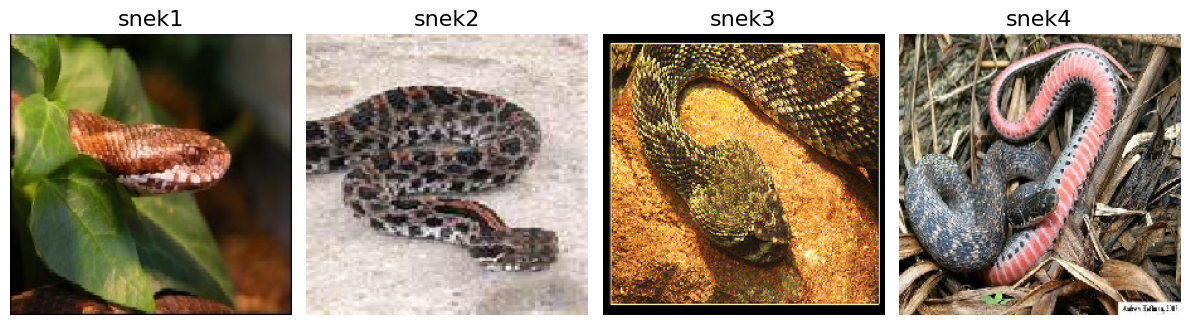

In [3]:
#Загрузка изображений
plt.rcParams['figure.figsize'] = (18, 6)

img1 = load_img('Sneks/1.jpg', target_size=(224, 224))
img2 = load_img('Sneks/2.jpg', target_size=(224, 224))
img3 = load_img('Sneks/3.jpg', target_size=(224, 224))
img4 = load_img('Sneks/4.jpg', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

X = preprocess_input(images)


Titles = ['snek1', 'snek2', 'snek3', 'snek4']

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(Titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
#ReplaceToLinear
replace2linear = ReplaceToLinear()
guided = GuidedBackpropagation()

score = CategoricalScore([22, 92, 26, 27])

def score_function(output):
    return (output[0][66], output[1][68], output[2][67], output[3][52])

In [5]:
#Данные о модели
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

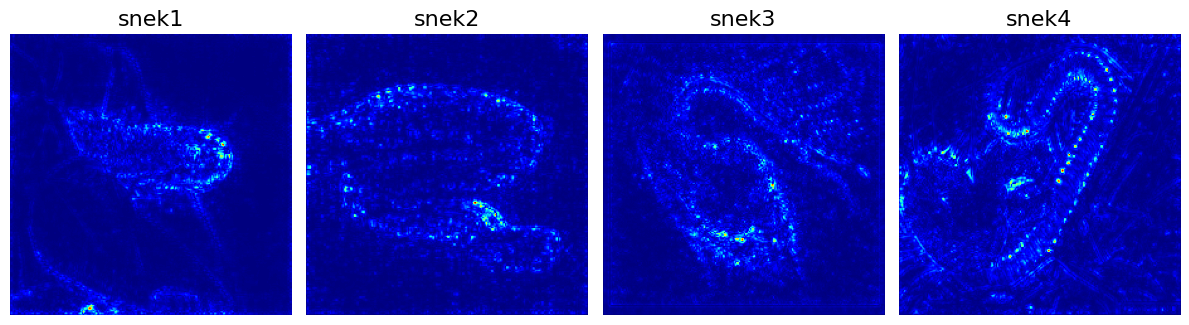

In [6]:
#Отображение карт значимости
#Saliency
saliency = Saliency(model, model_modifier=guided, clone=True)
saliency_map = saliency(score, X)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(Titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

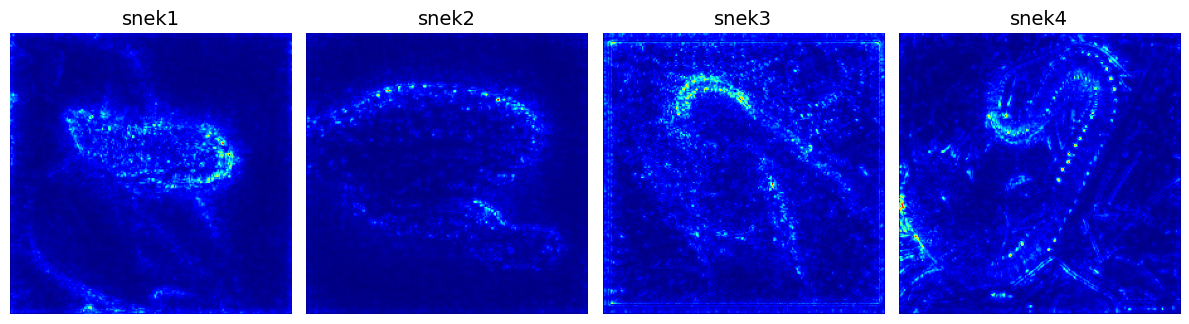

In [7]:
#SmoothGrad
mapList = saliency(score,X,smooth_samples=20,smooth_noise=0.20)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, title in enumerate(Titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

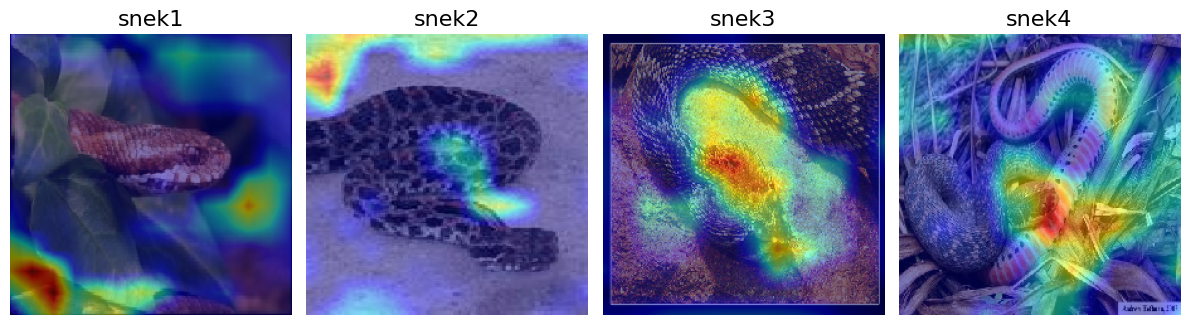

In [8]:
#GradCam
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
cam = gradcam(score, X, penultimate_layer=-1)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(Titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

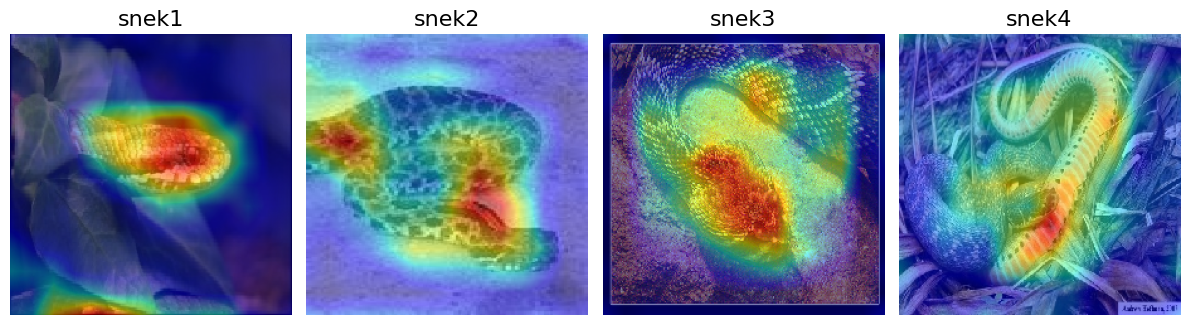

In [9]:
#GradCam++
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

cam = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(Titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()